# Описание проекта:

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки 
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей; с подпиской Ultra 
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

Описание столбцов:

Датасет: users_go.csv
- `user_id` - уникальный идентификатор пользователя.
- `name` - имя пользователя
- `age` - возраст пользователя
- `city` - город пользователя
- `subscription_type` - тип подписки пользователя (ultra, free)

Датасет: rides_go.csv
- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

Датафрейм: subscriptions_go.csv

- `subscription_type` - тип подписки (ultra, free)
- `minute_price` - стоимость одной минуты по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('/Users/artemmm/Downloads/users_go.csv')
rides = pd.read_csv('/Users/artemmm/Downloads/rides_go.csv')
subscr = pd.read_csv('/Users/artemmm/Downloads/subscriptions_go.csv')

импортирую все датафреймы

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subscr.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


просмотрел первые 5 строк каждого датафрейма

In [6]:
users.info()
rides.info()
subscr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

изучил информацию о каждом датафрейме

Вывод: Датасеты импортировались успешно. Все типы столбцов, кроме столбца 'date' в датафрейме 'rides' правильные.

#### Шаг 2. Предобработка данных

ОБРАБОТКА ДУБЛИКАТОВ

In [7]:
rides['date'] = pd.to_datetime(
    rides['date'], format='%Y-%m-%d'
)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


поменял тип столбца date с object, на datetime64

In [8]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


добавил столбец с номером месяца в датафрейм rides

In [9]:
rides.duplicated().sum()

0

In [10]:
users.duplicated().sum()

31

In [11]:
#print(users[users.duplicated() == True]) #смотрел дубликаты и выбрал один для сравнения
print(users[users['user_id'] == 293])

      user_id   name  age       city subscription_type
292       293  Агата   26  Краснодар             ultra
1534      293  Агата   26  Краснодар             ultra


в датафрейме users были найдены дублирующие строчки. Их 31 штука, удалим.

In [12]:
users = users.drop_duplicates()
users.duplicated().sum()

0

ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

In [13]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

пропущенных значений не найдено

#### Шаг 3. Исследовательский анализ данных

3.1 частота встречаемости городов;

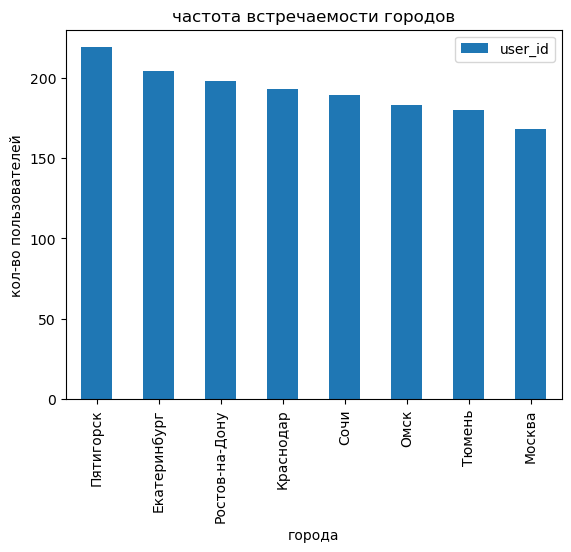

In [15]:
users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by = 'user_id', ascending = False).plot(kind = 'bar', xlabel = 'города', ylabel = 'кол-во пользователей', title = 'частота встречаемости городов');

Видимого различия между частотой встречаемости городов нет, самый частовстречаемый - Пятигорск, редковстречаемый - Москва ;)

3.2 соотношение пользователей с подпиской и без подписки;

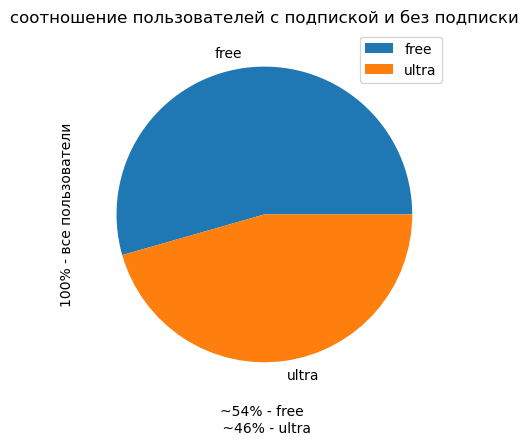

In [16]:
users.pivot_table(index= 'subscription_type', values = 'user_id', aggfunc = 'count').plot(kind = 'pie', y = 'user_id', title = 'соотношение пользователей с подпиской и без подписки');
plt.ylabel('100% - все пользователи')
plt.xlabel('~54% - free \n ~46% - ultra')
plt.show()

На плоте видно, что бесплатной подпиской пользуется большее кол-во пользователей, примерно на 120 человек больше, чем платной.

3.3 возраст пользователей;

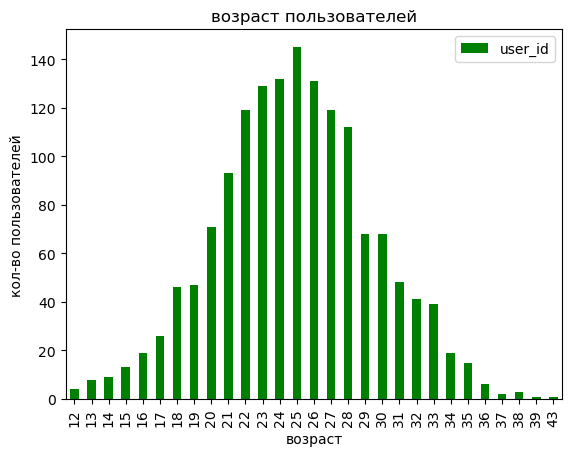

In [17]:
users.pivot_table(index= 'age', values = 'user_id', aggfunc = 'count').plot(kind = 'bar', color = 'green', ylabel = 'кол-во пользователей', xlabel = 'возраст', title = 'возраст пользователей');

возраст 25 лет встречается чаще всего. Разброс возрастов идет от 12 до 43. 

3.4 расстояние, которое пользователь преодолел за одну поездку;

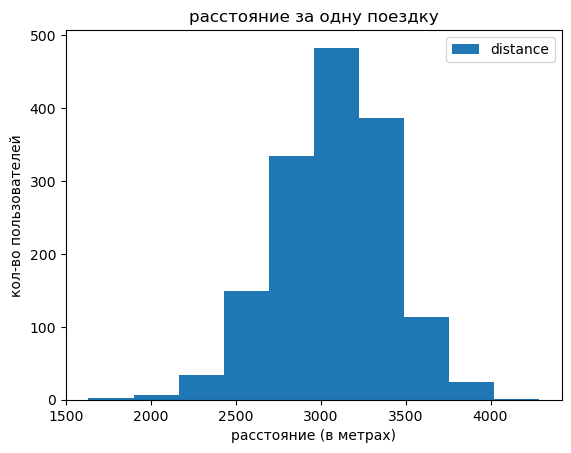

In [18]:
rides.pivot_table(index= 'user_id', values = 'distance').plot(kind = 'hist', title = 'расстояние за одну поездку', xlabel = 'расстояние', ylabel = 'кол-во пользователей');
plt.xlabel('расстояние (в метрах)')
plt.ylabel('кол-во пользователей')
plt.show()

чаще всего совершаются поездки около 3000-3200 метров.

3.5 продолжительность поездок.

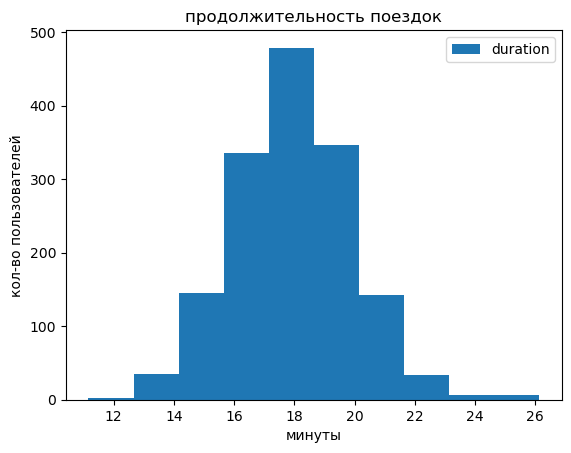

In [19]:
rides.pivot_table(index= 'user_id', values = 'duration').plot(kind = 'hist', title = 'продолжительность поездок');
plt.xlabel('минуты')
plt.ylabel('кол-во пользователей')
plt.show()

график показывает, что поездки совершаются чаще всего в районе 18 минут.

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [20]:
data = rides.merge(users,how = 'inner')
data = data.merge(subscr, how = 'inner')
data[data['user_id'] == 700]

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,Айдар,22,Омск,free,8,50,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


18068 строк получилось после объединения. Все три датафрейма были объеденины без потери данных.

4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.

In [22]:
data_without_sub = data[data['subscription_type'] == 'free']
data_with_sub = data[data['subscription_type'] == 'ultra']

In [23]:
data_without_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int32         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


11568 поездок без подписки.

In [24]:
data_with_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int32         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


6500 поездок с использованием подписки.

4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.


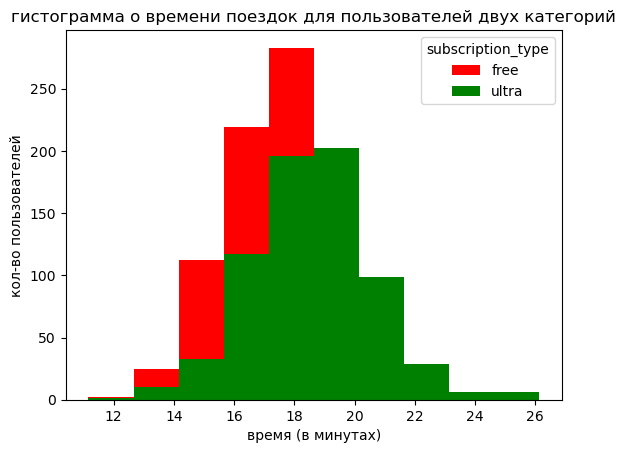

In [25]:
data.pivot_table(index = 'user_id', columns = 'subscription_type',values = 'duration').plot(kind = 'hist', color = ['red', 'green'], ylabel = 'кол-во пользователей', xlabel = 'минут в пути', title = 'гистограмма о времени поездок для пользователей двух категорий');
plt.ylabel('кол-во пользователей')
plt.xlabel('время (в минутах)')
plt.show()

на графике видно, что время поездки отличается не сильно в зависимости от подписки, пользователи с подпиской ездят чуть дольше, чем те, кто подпиской не пользуются, но разница незначимая.

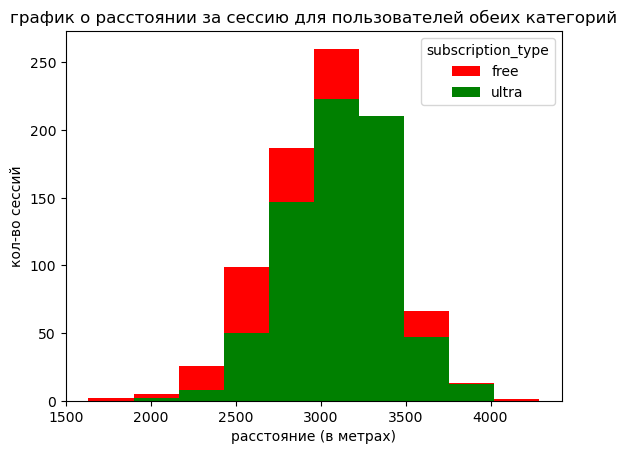

In [26]:
data.pivot_table(index = 'user_id', columns = 'subscription_type',values = 'distance').plot(kind = 'hist', color = ['red', 'green'], ylabel = 'расстояние за сессию', xlabel = 'кол-во пользователей', title = 'график о расстоянии за сессию для пользователей обеих категорий');
plt.xlabel('расстояние (в метрах)')
plt.ylabel('кол-во сессий')
plt.show()

С расстоянием поездки та же ситуация, что неудивительно - расстояние поездки примерно одинаковое что у пользователей с подпиской, что без неё.

#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [27]:
data['values'] = 1

Создаем столбец 'values', в котором каждая строчка будет заполнена числом 1 - она означает 1 поездку.

In [28]:
data_stat = data.pivot_table(index = ['user_id', 'month', 'subscription_type'], values = ['duration','distance', 'values'], aggfunc = {'duration':'sum', 'distance':'sum', 'values':'sum'})
data_stat = data_stat.reset_index()
data_stat.head()

,user_id,month,subscription_type,distance,duration,values
0,1,1,ultra,7027.511294,41.416640,2
1,1,4,ultra,754.159807,6.232113,1
2,1,8,ultra,6723.470560,44.776802,2
3,1,10,ultra,5809.911100,31.578017,2
4,1,11,ultra,7003.499363,53.397424,3


через сводную таблицу было посчитано: общее расстояние, общее время, кол-во поездок за каждый месяц для каждого пользователя.

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26

In [29]:
data_stat = data_stat.merge(subscr, on = 'subscription_type', how = 'left')
data_stat.head()

,user_id,month,subscription_type,distance,duration,values,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,7027.511294,41.416640,2,6,0,199
1,1,4,ultra,754.159807,6.232113,1,6,0,199
2,1,8,ultra,6723.470560,44.776802,2,6,0,199
3,1,10,ultra,5809.911100,31.578017,2,6,0,199
4,1,11,ultra,7003.499363,53.397424,3,6,0,199


Датафреймы объеденины. Добавляем столбец с выручкой.

In [30]:
def profit(row):
    if row['subscription_type'] == 'ultra':
        return (199 + (row['duration'] * 6))
    else:
        return (50 * row['values'] + (row['duration'] * 8))
data_stat['profit'] = data_stat.apply(profit, axis = 1)
data_stat['profit'] = np.ceil(data_stat['profit'])
data_stat['profit'] = data_stat['profit'].astype(int)
data_stat.head()

,user_id,month,subscription_type,distance,duration,values,minute_price,start_ride_price,subscription_fee,profit
0,1,1,ultra,7027.511294,41.416640,2,6,0,199,448
1,1,4,ultra,754.159807,6.232113,1,6,0,199,237
2,1,8,ultra,6723.470560,44.776802,2,6,0,199,468
3,1,10,ultra,5809.911100,31.578017,2,6,0,199,389
4,1,11,ultra,7003.499363,53.397424,3,6,0,199,520


Столбец 'profit' - это столбец с прибылью за каждый месяц. Прибыль посчитана и округлена.

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [31]:
var = 0
mean = data_without_sub['duration'].mean()
for i in data_without_sub['duration']:
    var += (i - mean) * (i - mean)
var /= len(data_without_sub['duration'])
print('Дисперсия пользователей без подписки:', var)
print('Среднее пользователей без подписки:', data_without_sub['duration'].mean())


var = 0
for i in data_without_sub['duration']:
    var += (i - mean) * (i - mean)
var /= len(data_without_sub['duration'])
std = var**0.5 # извлекаем корень

print('Стандартное отклонение пользователей без подписки:', std, '\n')

mean = data_with_sub['duration'].mean()
var = 0
for i in data_with_sub['duration']:
    var += (i - mean) * (i - mean)
var /= len(data_with_sub['duration'])
print('Дисперсия пользователей с подпиской:', var)
print('Среднее пользователей с подпиской:', data_with_sub['duration'].mean())

var = 0
for i in data_with_sub['duration']:
    var += (i - mean) * (i - mean)
var /= len(data_with_sub['duration'])
std = var**0.5 # извлекаем корень

print('Стандартное отклонение пользователей с подпиской:', std, '\n')

mean = data['duration'].mean()
var = 0
for i in data['duration']:
    var += (i - mean) * (i - mean)
var /= len(data['duration'])
print('Дисперсия пользователей:', var)
print('Среднее пользователей:', data['duration'].mean())

var = 0
for i in data['duration']:
    var += (i - mean) * (i - mean)
var /= len(data['duration'])
std = var**0.5 # извлекаем корень

print('Стандартное отклонение пользователей:', std, '\n')

Дисперсия пользователей без подписки: 40.02497415138629
Среднее пользователей без подписки: 17.39090929866399
Стандартное отклонение пользователей без подписки: 6.32652939228028 

Дисперсия пользователей с подпиской: 31.04294601091915
Среднее пользователей с подпиской: 18.54198516280583
Стандартное отклонение пользователей с подпиской: 5.571619693672492 

Дисперсия пользователей: 37.09885345286466
Среднее пользователей: 17.80501119798444
Стандартное отклонение пользователей: 6.090882813916605 



Формулируем гипотезу так: H0 - среднее выборки пользователей с подпиской ultra <=  среднему выборки пользователей с подпиской free (меньше или равно). H1 - среднее выборки пользователей с подпиской ultra > среднее выборки пользователей с подпиской free. Будем использовать тест Стьюдента, который на выходе покажет - отвергать гипотезу или нет (больше).

In [32]:
alpha = 0.05

stat,results = st.ttest_ind(data_with_sub['duration'], data_without_sub['duration'], alternative = 'greater')

print('p-значение:', results)
print('stat:', stat)

if (results < alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной: среднее значение выборки ultra <= (меньше или равно) среднего значения выборки free")
else:
    print("Не получилось отвергнуть нулевую гипотезу: среднее значение выборки ultra > (больше) среднего значения выборки free")

p-значение: 1.2804098316645618e-34
stat: 12.241203729044017
Отвергаем нулевую гипотезу в пользу альтернативной: среднее значение выборки ultra <= (меньше или равно) среднего значения выборки free


Тест показал, что нужно отвергнуть нулевую гипотезу, следовательно - она неверна.

Вывод: тест Стьюдента отвергнул нулевую гипотезу, потому что среднее значение первой выборки оказалось меньше, чем среднее значение второй выборки, т.е. пользователи с подпиской в среднем тратят меньше времени на поездки, чем без подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Формируем гипотезу: 
H0 - среднее расстояние выборки, которое проезжают пользователи с подпиской за одну поездку <= 3130.(меньше или равно)
H1 - среднее расстояние выборки, которое проезжают пользователи с подпиской за одну поездку больше 3130.
Будем использовать тест Стьюдента.

In [33]:
interested_value = 3130
alpha = 0.025
results = st.ttest_1samp(data_with_sub['distance'], interested_value, alternative = 'greater')
print('p-значение:', results.pvalue )
if (results.pvalue < alpha) :
    print('Отвергаем нулевую гипотезу в пользу альтернативной: расстояние, которое проезжают пользователи с подпиской за одну поездку в среднем меньше или равно 3130 метров.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние, которое проезжают пользователи в среднем с подпиской за одну поездку больше 3130 метров') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние, которое проезжают пользователи в среднем с подпиской за одну поездку больше 3130 метров


Да, альтернативная гипотеза была отвергнута, следовательно, нулевая гипотеза верна.

Вывод: тесты Стъюдента показали, что нулевая гипотеза оказалась верна. Среднее расстояние, которое проезжают пользователи с подпиской не первышает 3130 метров.

6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [34]:
data_without_sub = data_stat[data_stat['subscription_type'] == 'ultra']
data_with_sub = data_stat[data_stat['subscription_type'] == 'free']

var = 0
mean = data_without_sub['profit'].mean()
for i in data_without_sub['profit']:
    var += (i - mean) * (i - mean)
var /= len(data_without_sub['profit'])
print('Дисперсия пользователей без подписки:', var)
print('Среднее пользователей без подписки:', data_without_sub['profit'].mean())


var = 0
for i in data_without_sub['profit']:
    var += (i - mean) * (i - mean)
var /= len(data_without_sub['profit'])
std = var**0.5 # извлекаем корень

print('Стандартное отклонение пользователей без подписки:', std, '\n')

mean = data_with_sub['profit'].mean()
var = 0
for i in data_with_sub['profit']:
    var += (i - mean) * (i - mean)
var /= len(data_with_sub['profit'])
print('Дисперсия пользователей с подпиской:', var)
print('Среднее пользователей с подпиской:', data_with_sub['profit'].mean())

var = 0
for i in data_with_sub['profit']:
    var += (i - mean) * (i - mean)
var /= len(data_with_sub['profit'])
std = var**0.5 # извлекаем корень

print('Стандартное отклонение пользователей с подпиской:', std, '\n')

mean = data_stat['profit'].mean()
var = 0
for i in data_stat['profit']:
    var += (i - mean) * (i - mean)
var /= len(data_stat['profit'])
print('Дисперсия пользователей:', var)
print('Среднее пользователей:', data_stat['profit'].mean())

var = 0
for i in data_stat['profit']:
    var += (i - mean) * (i - mean)
var /= len(data_stat['profit'])
std = var**0.5 # извлекаем корень

print('Стандартное отклонение пользователей:', std, '\n')

Дисперсия пользователей без подписки: 7461.007496025567
Среднее пользователей без подписки: 359.02978160158835
Стандартное отклонение пользователей без подписки: 86.3771236846051 

Дисперсия пользователей с подпиской: 32582.00618209609
Среднее пользователей с подпиской: 322.32362459546925
Стандартное отклонение пользователей с подпиской: 180.5048647047943 

Дисперсия пользователей: 22855.65283462835
Среднее пользователей: 337.0080310652193
Стандартное отклонение пользователей: 151.18086133710295 



H0 - средняя помесячная выручка пользователей с подпиской по месяцам <= средней помесячной выручке пользователей без подписки по месяцам (меньше или равно). H1 - средняя помесячная выручка пользователей с подпиской по месяцам > средняя помесячная выручка пользователей без подписки по месяцам (больше). Воспользуемся тестом Стьюдента.

In [35]:
alpha = 0.05

stat, results = st.ttest_ind(data_stat[data_stat['subscription_type'] == 'ultra']['profit'],
                             data_stat[data_stat['subscription_type'] == 'free']['profit'],
                             alternative = 'greater')


print('p-значение:', results)
print('stat', stat)

if (results < alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной: средняя помесячная выручка пользователей с подпиской по месяцам меньше или равно (>=) средней помесячной выручки пользователей без подписки по месяцам")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средняя помесячная выручка пользователей с подпиской по месяцам больше (>) средней помесячной выручки пользователей выборки без подписки по месяцам")

p-значение: 2.758832300750934e-37
stat 12.751091742764944
Отвергаем нулевую гипотезу в пользу альтернативной: средняя помесячная выручка пользователей с подпиской по месяцам меньше или равно (>=) средней помесячной выручки пользователей без подписки по месяцам


На основе теста Стьюдента можно сделать вывод, что выручка от пользователей с подпиской не выше, чем от пользователей без подписки, это значит, что нужно привлекать пользователей, не использующих подписку, покупать её.

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки этой гипотезы мне бы понадобился метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

#### Шаг 7. Распределения

*ВЫВОД:* В ходе проектной работы я побывал в роли аналитика популярного сервиса аренды самокатов GoFast. Моя работа заключалась в проверке данных и гипотез, которые могут помочь бизнесу вырасти.

Я описал и визуализировал:
- частоту встречаемости городов: самый частовстречаемый - Пятигорск. Красивый город с большим количеством туристов; самый редковстречаемый - Москва. Скорее всего, самокатов сервиса GoFast в Москве довольно мало, поэтому пользователей оттуда малое количество, возможно нужно нарастить масштабы.
- соотношение пользователей с подпиской и без: примерно 54% пользователей не используют платную подписку, остальная часть - пользоавтели с подпиской.
- возраст пользователей: 25 лет - самый частовстречаемый возраст пользователей. График показал: чем дальше возраст от 25 лет, тем меньше пользователей этого возраста.
- расстояние, которое пользователи преодолевают за одну поездку: 3000-3200 метров самое частое пройденное расстояние за сессию.
- продолжительность поездок: чаще всего в районе 18 минут. График показал идеальное распределение, то есть, чем дальше брать время от 18 минут, тем меньше пользователей заканчивали одну сессию за это время.

Проверенные гипотезы:
- Проверил гипотезу о том, что пользователи с подпиской совершают более длительные поездки, чем пользователи без неё
- Проверил гипотезу о том, что расстояние пользователей с подпиской за одну сессию не превышает 3130 метров.
- Проверил гипотезу о том, что выручка по месяцам от пользователей с подпиской выше, чем выручка по месяцам от пользователей без подписки.

Выводы гипотез:
- Гипотеза №1 оказалась неверной, статесты показали, что пользователи с подпиской в среднем проезжают меньшее расстояние, чем пользователи без неё.
- Гипотеза №2 показала, что пользователи с подпиской в среднем проезжают расстояние больше 3130 метров.
- Гипотеза №3 дала понять, что средняя выручка от пользователей с подпиской ниже, чем средняя выручка пользователей без подписки.

Предложения для сервиса: 
1. Так как пользователи без подписки проезжают большее расстояние, чем пользователи с подпиской. Так как сервису выгоднее, чтобы пользователи с подпиской проезжали расстояние больше, чем пользователи без нее, то, возможными решениями для привлечения людей к покупке подписок будут: 
- снижение цены за подписку.
- повышение цены за поминутное использование сервиса для пользователей без подписки.
2. Повышение предложения аренды самокатов в Москве. Москва - столица России, самый крупный город России с большим количеством туристов, которые создают огромный спрос, а в нашем сервисе меньше всего пользователей оттуда. Если нарастить масштабы предложения самокатов в этом крупном городе, то, скорее всего, пользователей станет намного больше.